In [2]:
#we going to use the random forest classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


In [3]:
import pickle
import os


file_path = 'data.pickle'

if os.path.exists(file_path):
    # loading data
    with open(file_path, 'rb') as f:
        data_dict= pickle.load(f)
        print('data loaded succefuly')
else:
    print("data.pickle not found")


data loaded succefuly


In [4]:
data=np.asarray(data_dict['data'])
labels=np.asarray(data_dict['labels'])



In [5]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,shuffle=True,stratify=labels)

In [6]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
score=accuracy_score(y_predict,y_test)
print('{}% of samples classified correctly'.format(score*100))


100.0% of samples classified correctly


100.0% of samples classified correctly
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


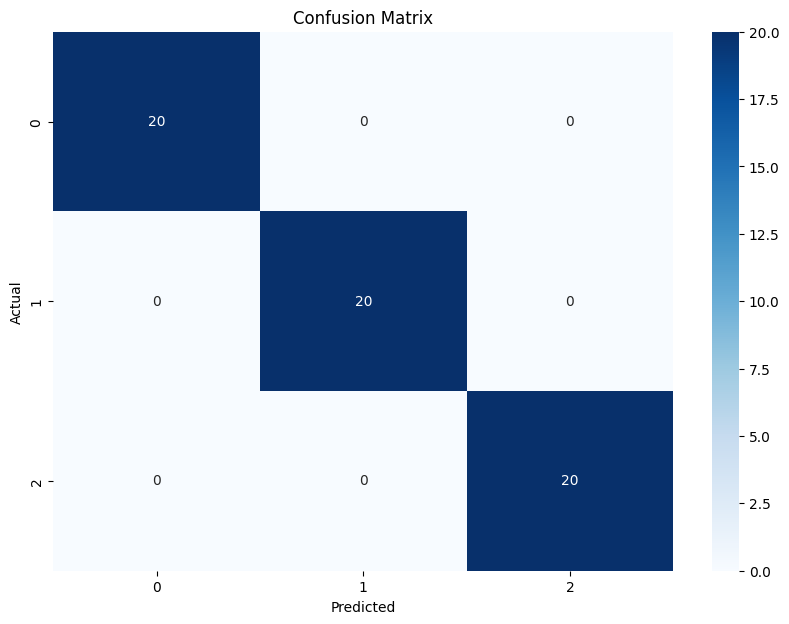

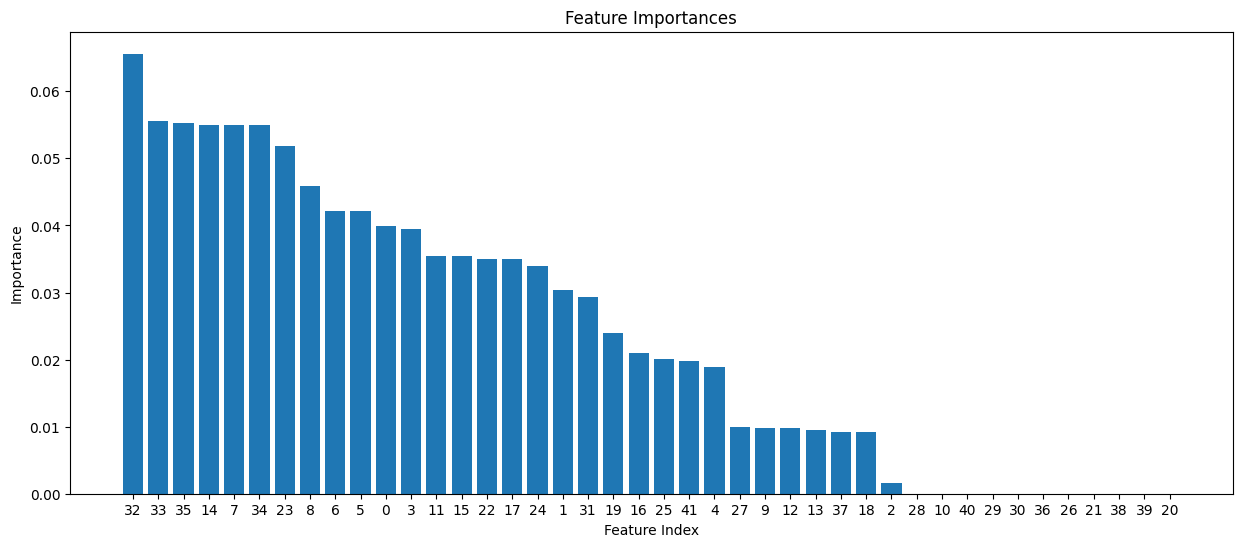

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix


# Initialisation et entraînement du modèle
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
score = accuracy_score(y_test, y_predict)
print('{}% of samples classified correctly'.format(score * 100))

# Statistiques détaillées
print("Classification Report:")
print(classification_report(y_test, y_predict))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# Matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Importance des caractéristiques
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


In [8]:
import joblib

# Sauvegarder le modèle
joblib.dump(model, 'model.joblib')
print("Model has been saved to model.joblib")


Model has been saved to model.joblib
